<a href="https://colab.research.google.com/github/JackGO-1998/XLE-energy-index-replication/blob/main/XLE_replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Packages

# Note: Install yfinance and tensorflow APIs only if you don't have them (e.g., you get an error message when referring to them in your code)

# !pip3 install yfinance
# !pip3 install tensorflow

import yfinance as yf
import os
import time
import numpy as np
import scipy as sci
import scipy.io as sio
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
import tensorflow as tf
#from tensorflow.keras.layers import Dense
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


from numpy.random import seed
seed(100)
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
raw_XLE = pd.read_excel("https://github.com/JackGO-1998/XLE-energy-index-replication/raw/refs/heads/main/XLE%20holdings_6.2025.xlsx")
# get raw data on IBBQ, an ETF that tracks the NBI
print("Size of the dataset (row, col): ", raw_XLE.shape)
raw_XLE

Size of the dataset (row, col):  (26, 8)


,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,EXXON MOBIL CORP,XOM,30231G102,2326618,23.304046,-,5.980112e+07,USD
1,CHEVRON CORP,CVX,166764100,2838555,15.059282,-,2.925024e+07,USD
2,CONOCOPHILLIPS,COP,20825C104,2685717,7.508996,-,2.232961e+07,USD
3,WILLIAMS COS INC,WMB,969457100,2967181,4.798737,-,2.267931e+07,USD
4,EOG RESOURCES INC,EOG,26875P101,2318024,4.400290,-,1.027480e+07,USD
5,KINDER MORGAN INC,KMI,49456B101,B3NQ4P8,3.825070,-,3.893952e+07,USD
6,MARATHON PETROLEUM CORP,MPC,56585A102,B3K3L40,3.731477,-,6.365258e+06,USD
7,ONEOK INC,OKE,682680103,2130109,3.668340,-,1.249770e+07,USD
8,PHILLIPS 66,PSX,718546104,B78C4Y8,3.590175,-,8.319001e+06,USD
9,SCHLUMBERGER LTD,SLB,806857108,2779201,3.570585,-,2.821805e+07,USD


In [3]:
XLE_tickers = raw_XLE['Ticker']
XLE_tickers
XLE_tickers.dropna()

,Ticker
0,XOM
1,CVX
2,COP
3,WMB
4,EOG
5,KMI
6,MPC
7,OKE
8,PSX
9,SLB


In [4]:
XLE_tickers= XLE_tickers.drop([22, 24])

In [5]:
XLE_tickers.reset_index(drop=True)

,Ticker
0,XOM
1,CVX
2,COP
3,WMB
4,EOG
5,KMI
6,MPC
7,OKE
8,PSX
9,SLB


In [6]:
tickers = XLE_tickers.tolist()
df_data_download = yf.download(tickers,start='2020-06-12',end='2025-06-09', interval="1d", auto_adjust=True)

[**********************50%                       ]  12 of 24 completedERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  24 of 24 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IXPM5']: YFTzMissingError('possibly delisted; no timezone found')


In [7]:
df_data_download

Price      Adj Close      Close                                               \
Ticker         IXPM5        APA        BKR        COP       CTRA         CVX   
Date                                                                           
2020-06-12       NaN  12.306573  13.856306  36.345741  15.594070   74.200302   
2020-06-15       NaN  12.583627  14.212712  36.029911  15.073488   73.268692   
2020-06-16       NaN  13.021552  14.638659  37.492729  15.003564   75.517418   
2020-06-17       NaN  12.413817  13.995392  36.586781  14.677231   73.517647   
2020-06-18       NaN  12.708747  14.004085  36.944164  14.583994   73.838905   
...              ...        ...        ...        ...        ...         ...   
2025-06-02       NaN  17.330000  37.320000  86.720001  25.080000  137.839996   
2025-06-03       NaN  18.270000  37.540001  87.910004  25.440001  139.550003   
2025-06-04       NaN  17.920000  37.290001  85.949997  24.889999  137.369995   
2025-06-05       NaN  17.850000  37.150002  85.349998  24.830000  136.899994   
2025-06-06       NaN  18.500000  37.900002  87.220001  25.580000  140.210007   

Price                                                     ...   Volume  \
Ticker            DVN         EOG        EQT         EXE  ...      MPC   
Date                                                      ...            
2020-06-12   9.613274   41.296558  13.995530         NaN  ...  7688900   
2020-06-15   9.680868   41.013744  13.598627         NaN  ...  9565800   
2020-06-16   9.988791   42.891228  13.305676         NaN  ...  7253800   
2020-06-17   9.485598   41.225853  13.248978         NaN  ...  5498500   
2020-06-18   9.725930   41.579346  12.927675         NaN  ...  6219300   
...               ...         ...        ...         ...  ...      ...   
2025-06-02  30.922300  111.339996  56.660000  119.300003  ...  2960500   
2025-06-03  31.786217  112.820000  56.650002  118.220001  ...  2004700   
2025-06-04  31.339365  110.769997  55.490002  116.199997  ...  2582200   
2025-06-05  31.200344  111.029999  55.330002  115.570000  ...  1532900   
2025-06-06  32.064262  114.050003  56.389999  117.349998  ...  1351700   

Price                                                                        \
Ticker           OKE       OXY      PSX       SLB     TPL     TRGP      VLO   
Date                                                                          
2020-06-12  31498500  44937900  3025700  14646700  147900  5819100  3575200   
2020-06-15  12268600  46134000  4308900  12742000  147900  3841500  4972900   
2020-06-16   9837200  57505000  3419100  17831200   83400  3932500  4046100   
2020-06-17   5267100  38371600  3665500  15816600   31200  2549800  4649800   
2020-06-18   4244400  36051700  3760200  15867700   98100  2302100  3817800   
...              ...       ...      ...       ...     ...      ...      ...   
2025-06-02   4111500   8003700  2841300  12681500  156700  1815700  2824500   
2025-06-03   3902000  12204400  2065500  16171900  152300  1979800  2310700   
2025-06-04   6153200  11577600  3686100  13545100  173500  2487500  4458400   
2025-06-05   5371600   7011700  2836300  11545800  137300  1903500  1845400   
2025-06-06   3617100   6850100  2821100  10410100  109200  1921500  2607400   

Price                           
Ticker           WMB       XOM  
Date                            
2020-06-12   9381300  30978100  
2020-06-15  13572900  27929300  
2020-06-16   9298500  26203400  
2020-06-17   6779700  19279400  
2020-06-18   8987900  21478700  
...              ...       ...  
2025-06-02  11558300  17290500  
2025-06-03   9977400  19194300  
2025-06-04   7445100  15648500  
2025-06-05   4844600  13924800  
2025-06-06   5273300  15487800  

[1253 rows x 121 columns]

In [9]:
holdingsreturn = df_data_download['Close']
holdingsreturn.drop('IXPM5',axis=1)

Ticker,APA,BKR,COP,CTRA,CVX,DVN,EOG,EQT,EXE,FANG,...,MPC,OKE,OXY,PSX,SLB,TPL,TRGP,VLO,WMB,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,12.306573,13.856306,36.345741,15.594070,74.200302,9.613274,41.296558,13.995530,NaN,37.787605,...,31.526989,24.575342,17.601263,62.830383,17.122244,194.334656,17.786146,52.063046,13.960498,37.585426
2020-06-15,12.583627,14.212712,36.029911,15.073488,73.268692,9.680868,41.013744,13.598627,NaN,38.721031,...,32.577309,26.269444,18.124548,61.480415,17.410620,193.891434,19.897293,51.899811,14.642063,37.561531
2020-06-16,13.021552,14.638659,37.492729,15.003564,75.517418,9.988791,42.891228,13.305676,NaN,40.209679,...,33.266045,27.682407,19.304308,62.651482,17.617884,198.782364,20.685574,53.997341,14.825850,38.406139
2020-06-17,12.413817,13.995392,36.586781,14.677231,73.517647,9.485598,41.225853,13.248978,NaN,37.457680,...,31.966063,26.074804,18.115034,59.268417,17.870214,193.751968,19.244923,50.863285,14.534847,37.155148
2020-06-18,12.708747,14.004085,36.944164,14.583994,73.838905,9.725930,41.579346,12.927675,NaN,37.489883,...,33.119690,26.204567,18.714426,62.000881,18.185623,190.584335,19.679838,52.748611,14.894774,37.386227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,17.330000,37.320000,86.720001,25.080000,137.839996,30.922300,111.339996,56.660000,119.300003,137.589996,...,158.750000,82.510002,41.209988,114.279999,33.061436,1110.140015,162.350006,128.300003,60.760098,103.050003
2025-06-03,18.270000,37.540001,87.910004,25.440001,139.550003,31.786217,112.820000,56.650002,118.220001,142.279999,...,161.970001,83.239998,42.453049,115.970001,33.825001,1126.369995,164.929993,130.949997,60.601429,103.800003
2025-06-04,17.920000,37.290001,85.949997,24.889999,137.369995,31.339365,110.769997,55.490002,116.199997,139.350006,...,156.949997,80.519997,41.677380,112.480003,33.240002,1102.530029,160.679993,126.540001,59.619667,102.300003


In [10]:
# Compute the log-returns and replace the columns entries, which previously were closing prices,
# with the log-returns (and relabel the columns as well)
for i in range(len(holdingsreturn.columns)):
    holdingsreturn.loc[:,holdingsreturn.columns[i]]=np.log(holdingsreturn.loc[:,holdingsreturn.columns[i]]/holdingsreturn.loc[:,holdingsreturn.columns[i]].shift(1))
    holdingsreturn.rename(columns={holdingsreturn.columns[i]:holdingsreturn.columns[i]+' log retn'}, inplace=True)

/tmp/ipython-input-10-459544639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holdingsreturn.rename(columns={holdingsreturn.columns[i]:holdingsreturn.columns[i]+' log retn'}, inplace=True)


In [11]:
holdingsreturn

Ticker,APA log retn,BKR log retn,COP log retn,CTRA log retn,CVX log retn,DVN log retn,EOG log retn,EQT log retn,EXE log retn,FANG log retn,...,MPC log retn,OKE log retn,OXY log retn,PSX log retn,SLB log retn,TPL log retn,TRGP log retn,VLO log retn,WMB log retn,XOM log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15,0.022263,0.025396,-0.008728,-0.033953,-0.012635,0.007007,-0.006872,-0.028769,NaN,0.024402,...,0.032772,0.066663,0.029297,-0.021720,0.016702,-0.002283,0.112164,-0.003140,0.047667,-0.000636
2020-06-16,0.034209,0.029529,0.039798,-0.004650,0.030230,0.031312,0.044760,-0.021778,NaN,0.037725,...,0.020921,0.052391,0.063061,0.018869,0.011834,0.024912,0.038853,0.039620,0.012474,0.022237
2020-06-17,-0.047796,-0.044938,-0.024460,-0.021990,-0.026838,-0.051689,-0.039602,-0.004270,NaN,-0.070896,...,-0.039862,-0.059828,-0.063586,-0.055511,0.014221,-0.025632,-0.072189,-0.059793,-0.019823,-0.033115
2020-06-18,0.023480,0.000621,0.009721,-0.006373,0.004360,0.025021,0.008538,-0.024550,NaN,0.000859,...,0.035453,0.004964,0.032552,0.045072,0.017496,-0.016484,0.022347,0.036396,0.024461,0.006200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,0.018638,0.007261,0.015924,0.031183,0.008305,0.028666,0.025193,0.027374,0.026931,0.022342,...,-0.012458,0.020448,0.016055,0.007025,0.008736,-0.002061,0.027603,-0.005209,0.012482,0.007305
2025-06-03,0.052821,0.005878,0.013629,0.014252,0.012329,0.027555,0.013205,-0.000176,-0.009094,0.033519,...,0.020081,0.008808,0.029718,0.014680,0.022833,0.014514,0.015767,0.020444,-0.002615,0.007252
2025-06-04,-0.019343,-0.006682,-0.022548,-0.021857,-0.015745,-0.014158,-0.018338,-0.020689,-0.017234,-0.020808,...,-0.031484,-0.033222,-0.018440,-0.030556,-0.017446,-0.021393,-0.026106,-0.034257,-0.016333,-0.014556


In [12]:
# Divide data into training set and test set
train,test=train_test_split(holdingsreturn,test_size=0.2,random_state=100)

# Divide training set into training and validation set
train,validation=train_test_split(train,test_size=0.25,random_state=100)

In [13]:
# Let's take a look at the size of the data for the NN modeling
print("train:",train.shape)
print("validation:",validation.shape)
print("test:",test.shape)

train: (751, 24)
validation: (251, 24)
test: (251, 24)


In [19]:
print(i, x_train.shape, x_val.shape, x_test.shape)

23 (751,) (250,) (251,)


In [15]:
num_stocks = len(holdingsreturn.columns)
num_stocks

24

In [16]:
# Create Autoencoder Model

# Here we create a model for each stock and, for each, save the resulting MSE
# We then rank (in the next cell) the stocks on the basis of the MSE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model=list(range(num_stocks))
mse_test=[]

for i in range (num_stocks):
    x_train=train.iloc[:,i].dropna()    #remove NaN values
    y_train=x_train
    x_val=validation.iloc[:,i].dropna()
    y_val=x_val
    x_test=test.iloc[:,i].dropna()
    y_test=x_test

    model[i] = Sequential([ Input(shape=(1,)),            # Define input layer correctly: input is return for one stock
                            Dense(20, activation="relu"),
                            Dense(5, activation="relu"),
                            Dense(20, activation="relu"),
                            Dense(1, activation="sigmoid") # Define output layer correctly: ouput is return for the same stock
                        ])


    model[i].compile(loss = "mse",optimizer = "Adam")

    checkpoint_cb = keras.callbacks.ModelCheckpoint("implied.h5",save_best_only = True)
    early_stopping_cb = keras.callbacks.EarlyStopping(patience = 50,restore_best_weights = True)

    history=model[i].fit(x_train,y_train,
                      epochs=200,
                      batch_size = 50,
                      validation_data= (x_val,y_val),
                      verbose = 0)

 # Calcuate  and save MSE for testing set
    mse_test.append(model[i].evaluate(x_test,y_test,verbose=0))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

we received error "setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.", which suggest the shape does not match, so we check the mse_test

In [18]:
for i, val in enumerate(mse_test):
    print(i, val, type(val))
# we find out the 12 is the problem, so we give further check to see what cause the error

0 0.0005752206780016422 <class 'float'>
1 0.00044882093789055943 <class 'float'>
2 0.0005012743058614433 <class 'float'>
3 0.0002939068654086441 <class 'float'>
4 0.00034699024399742484 <class 'float'>
5 0.0005203585023991764 <class 'float'>
6 0.00045203129411675036 <class 'float'>
7 0.0006231164443306625 <class 'float'>
8 0.00032775933505035937 <class 'float'>
9 0.0005769298877567053 <class 'float'>
10 0.00042636279249563813 <class 'float'>
11 0.00042593543184921145 <class 'float'>
12 [] <class 'list'>
13 0.00020669246441684663 <class 'float'>
14 0.0003451759403105825 <class 'float'>
15 0.00036066886968910694 <class 'float'>
16 0.00034026094363071024 <class 'float'>
17 0.0003987896197941154 <class 'float'>
18 0.0004444577789399773 <class 'float'>
19 0.0004759451257996261 <class 'float'>
20 0.0006984522333368659 <class 'float'>
21 0.00031579937785863876 <class 'float'>
22 0.00021168791863601655 <class 'float'>
23 0.0004117920470889658 <class 'float'>


In [23]:
i = 12
x_train = train.iloc[:, i].dropna()
x_val = validation.iloc[:, i].dropna()
x_test = test.iloc[:, i].dropna()

print(f"train: {len(x_train)}, val: {len(x_val)}, test: {len(x_test)}")
print("Total:", len(x_train) + len(x_val) + len(x_test))
# we find out the stock 12 do not have data, which we should check it out during the data cleaning
# we may apply 'pd.set_option('display.max_columns', None)' for data checking in future

train: 0, val: 0, test: 0
Total: 0


In [25]:
# Here we delete stock 12, then list the stock in increasing order of MSE
del mse_test[12]
print("stock #  |   mse   |      stock name")
ranking = np.array(mse_test).argsort()
for stock_index in ranking:
    print(stock_index, mse_test[stock_index], holdingsreturn.iloc[:,stock_index].name)

stock #  |   mse   |      stock name
20 0.00021168791863601655 TRGP log retn
3 0.0002939068654086441 CTRA log retn
19 0.00031579937785863876 TPL log retn
8 0.00032775933505035937 EXE log retn
14 0.00034026094363071024 MPC log retn
12 0.0003451759403105825 IXPM5 log retn
4 0.00034699024399742484 CVX log retn
13 0.00036066886968910694 KMI log retn
15 0.0003987896197941154 OKE log retn
21 0.0004117920470889658 VLO log retn
11 0.00042593543184921145 HES log retn
10 0.00042636279249563813 HAL log retn
16 0.0004444577789399773 OXY log retn
1 0.00044882093789055943 BKR log retn
6 0.00045203129411675036 EOG log retn
17 0.0004759451257996261 PSX log retn
2 0.0005012743058614433 COP log retn
5 0.0005203585023991764 DVN log retn
0 0.0005752206780016422 APA log retn
9 0.0005769298877567053 FANG log retn
7 0.0006231164443306625 EQT log retn
18 0.0006984522333368659 SLB log retn


Build a tracking portfolio based on the 5 "most communal" and the 5 "least communal stocks"

In [26]:

least_communal=5

# In this case we have a total of s stocks, where
s = 5 + least_communal

stock_index = np.concatenate((ranking[0:5], ranking[-least_communal:]))
stock_index

array([20,  3, 19,  8, 14,  5,  0,  9,  7, 18])

In [27]:
#Portfolio with 10 stocks
port10 = holdingsreturn.iloc[:, stock_index]
port10=port10.fillna(0)
port10

Ticker,TRGP log retn,CTRA log retn,TPL log retn,EXE log retn,MPC log retn,DVN log retn,APA log retn,FANG log retn,EQT log retn,SLB log retn
Date,,,,,,,,,,
2020-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-15,0.112164,-0.033953,-0.002283,0.000000,0.032772,0.007007,0.022263,0.024402,-0.028769,0.016702
2020-06-16,0.038853,-0.004650,0.024912,0.000000,0.020921,0.031312,0.034209,0.037725,-0.021778,0.011834
2020-06-17,-0.072189,-0.021990,-0.025632,0.000000,-0.039862,-0.051689,-0.047796,-0.070896,-0.004270,0.014221
2020-06-18,0.022347,-0.006373,-0.016484,0.000000,0.035453,0.025021,0.023480,0.000859,-0.024550,0.017496
...,...,...,...,...,...,...,...,...,...,...
2025-06-02,0.027603,0.031183,-0.002061,0.026931,-0.012458,0.028666,0.018638,0.022342,0.027374,0.008736
2025-06-03,0.015767,0.014252,0.014514,-0.009094,0.020081,0.027555,0.052821,0.033519,-0.000176,0.022833
2025-06-04,-0.026106,-0.021857,-0.021393,-0.017234,-0.031484,-0.014158,-0.019343,-0.020808,-0.020689,-0.017446


In [32]:
#Calculate index log return
IXE_values = yf.download('IXE',start='2020-06-12',end='2025-06-09', interval="1d", auto_adjust=True)

IXE_values

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,IXE,IXE,IXE,IXE,IXE
Date,,,,,
2020-06-12,412.450012,422.829987,401.179993,419.989990,0
2020-06-15,413.209991,417.630005,390.720001,392.609985,0
2020-06-16,425.029999,433.799988,413.459991,432.910004,0
2020-06-17,410.820007,423.350006,410.790009,422.320007,0
2020-06-18,416.119995,420.239990,404.320007,407.769989,0
...,...,...,...,...,...
2021-08-31,502.109985,507.369995,500.790009,505.540009,0
2021-09-01,494.480011,504.179993,492.809998,502.109985,0


In [33]:
#given YF is lack of the data for XLE's underlying index IXE
# we use the performance of XLE itself as the benchmark
XLE_values = yf.download('XLE',start='2020-06-12',end='2025-06-09', interval="1d", auto_adjust=True)

XLE_values

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,XLE,XLE,XLE,XLE,XLE
Date,,,,,
2020-06-12,32.399384,33.229303,31.520647,32.993345,42817500
2020-06-15,32.497013,32.830608,30.674448,31.016178,32847400
2020-06-16,33.432720,34.091775,32.480753,34.042955,32041900
2020-06-17,32.293610,33.310667,32.285475,33.302532,23368000
2020-06-18,32.692299,33.050302,31.772878,31.968154,18468900
...,...,...,...,...,...
2025-06-02,82.599998,83.169998,81.650002,83.059998,16015500
2025-06-03,83.580002,84.099998,81.879997,82.660004,15176300


In [34]:
#Calculate index log return
# Get NBI closing values
XLE_close = XLE_values[["Close"]]
idx_ret=np.log(XLE_close.pct_change()+1)
idx_ret=idx_ret.fillna(0)
idx_ret

Price,Close
Ticker,XLE
Date,
2020-06-12,0.000000
2020-06-15,0.003009
2020-06-16,0.028387
2020-06-17,-0.034666
2020-06-18,0.012270
...,...
2025-06-02,0.013039
2025-06-03,0.011795


In [36]:
# Divide data into training set and test set
X_train1,X_test1,Y_train1,Y_test1=train_test_split(port10,idx_ret,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X_train1,Y_train1,test_size=0.25,random_state=100)

In [37]:
# Create NN Index-Tracking Model
model = Sequential([
    Input(shape=(10,)),  # ✅ Define input layer explicitly
    Dense(5, activation="relu"),
    Dense(5, activation="relu"),
    Dense(10, activation="softmax")
])

# notice the softmax function, which generalizes the sigmoid from 1 dimension to multiple (i.e., 25 here)
# to reflect portfolio allocation across 25 stocks

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Define a loss function to capture the (Euclidean) distance between the index performance and that
# of the tracking portfolio above

def custom_loss_function (x_values, y_values):
      squared_difference = tf.square(x_values-y_values)
      return tf.reduce_mean(squared_difference, axis=-1)

In [39]:
#Compile NN Model
model.compile(loss = custom_loss_function, optimizer = "Adam")

In [40]:
#Get the weights of stocks in the portfolio
weights = model.predict(X_test1)
weights = weights[0]
weights

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([0.1004123 , 0.10053684, 0.09961235, 0.09920511, 0.09941616,
       0.10031449, 0.09995586, 0.10048372, 0.10016402, 0.09989902],
      dtype=float32)

In [44]:
#Calculate portfolio returns associated with these weights for the 10 stocks over different time periods
port_ret = np.dot(port10,weights)
port_ret

array([ 0.        ,  0.01504674,  0.01734733, ..., -0.02104923,
       -0.00170111,  0.02214765])

In [46]:
#Compare these portfolio returns based on the 10 stocks above with index returns
cl = custom_loss_function(np.array(port_ret), np.array(idx_ret))
cl.numpy()

array([0.00046378, 0.00046694, 0.00121398, ..., 0.00089025, 0.00046665,
       0.00077456])

In [47]:
mean_loss=np.mean(cl)
mean_loss

np.float64(0.0008115483294849082)

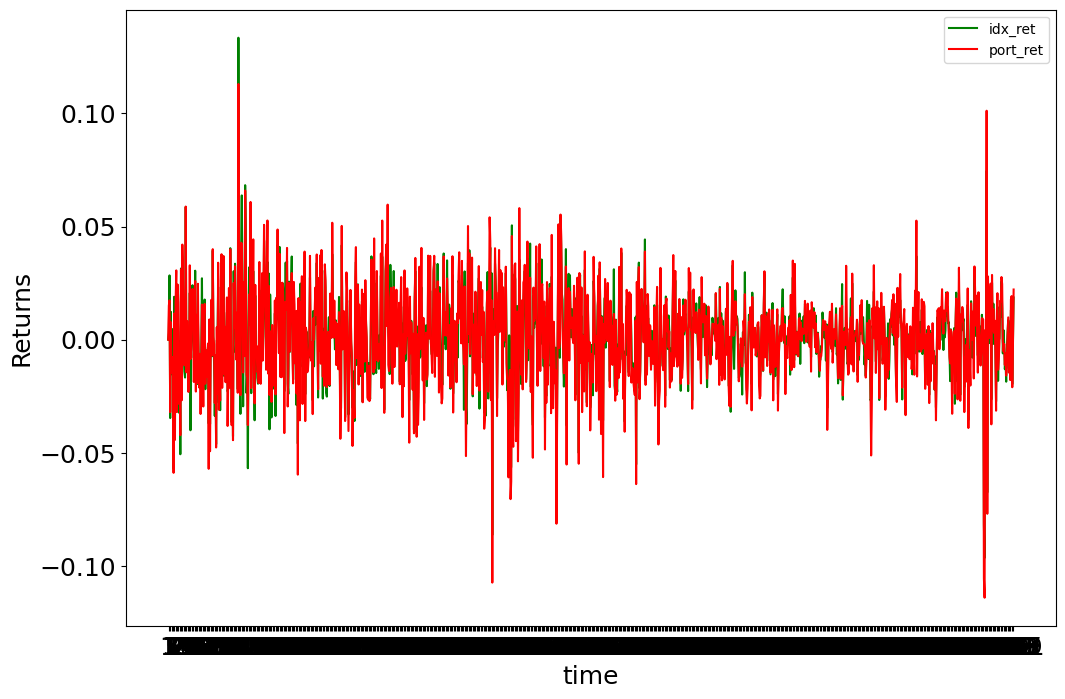

In [48]:
# Plot the returns of the index versus portfolio
# Number of time observations is:
numobs = len(XLE_values)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,8]
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret,color='red', label='port_ret')

plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()
plt.show()